Sandbox python module, for running some simple experiments to verify that the code works.
Contains code from https://adapt-python.github.io/adapt/examples/Two_moons.html

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

from adapt.feature_based import DANN

from datagen.visualize import visualize_shift2d_px, visualize_decision_boundary2d

from tensorflow.keras.optimizers.legacy import Adam

from datagen.conceptshift.selector import DomainSelector
from datagen.conceptshift.shifter import Shifter
from datagen.conceptshift.builder import ConceptShiftDataBuilder


In [7]:
# configure dataset generation
init_classification = dict(n_samples=1000, n_features=2, n_informative=2, n_repeated=0, n_redundant=0)
shifter = Shifter(n_domains=2, rot=0, trans=1.5, scale=0)
selector = DomainSelector(n_global=200, n_source=200, n_target=200, n_domains_source=1, n_domains_target=1)
builder = ConceptShiftDataBuilder(init_classification, shifter, selector)

xg, yg, xs, ys, xt, yt = builder.generate()
visualize_shift2d_px(xg, yg, xs, ys, xt, yt)

First train with source only by setting lambda=0 for DANN


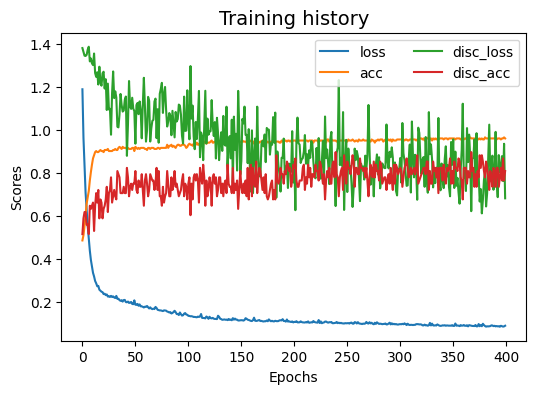

7/7 [==============================] - 0s 0s/step


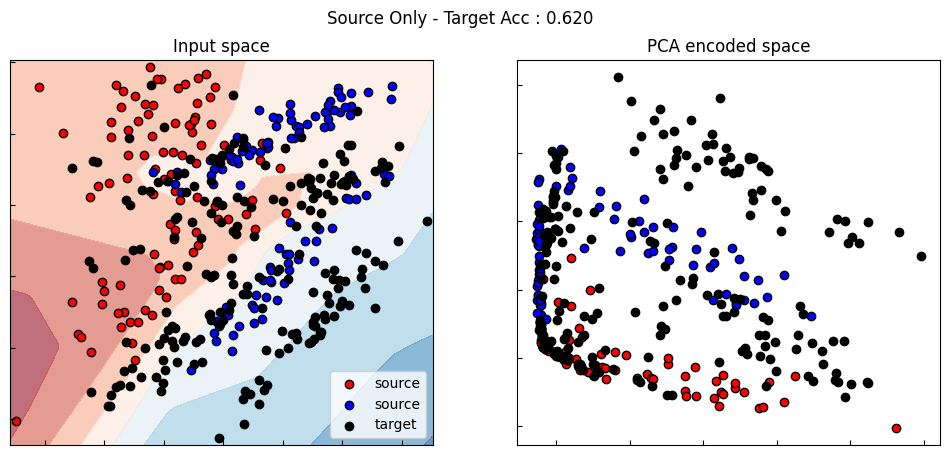

In [4]:
model_params = dict(loss="bce", optimizer=Adam(0.001, beta_1=0.5), lambda_=1, metrics=["acc"], random_state=0)
fit_params = dict(epochs=400, batch_size=34, verbose=0)

scr_only_params = model_params.copy()
scr_only_params['lambda_'] = 0

src_only = DANN(**scr_only_params)
src_only.fit(xs, ys, xt, yt, **fit_params)

pd.DataFrame(src_only.history_).plot(figsize=(6, 4))
plt.title("Training history", fontsize=14); plt.xlabel("Epochs"); plt.ylabel("Scores")
plt.legend(ncol=2)
plt.show()
visualize_decision_boundary2d(xs, ys, xt, yt, src_only, name="Source Only")

Repeat the same process with DANN (with nonzero lambda)

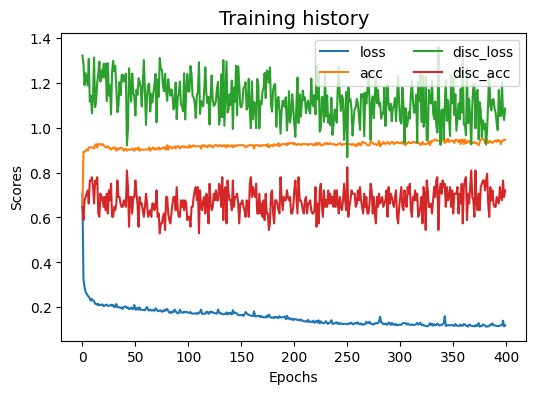

7/7 [==============================] - 0s 3ms/step


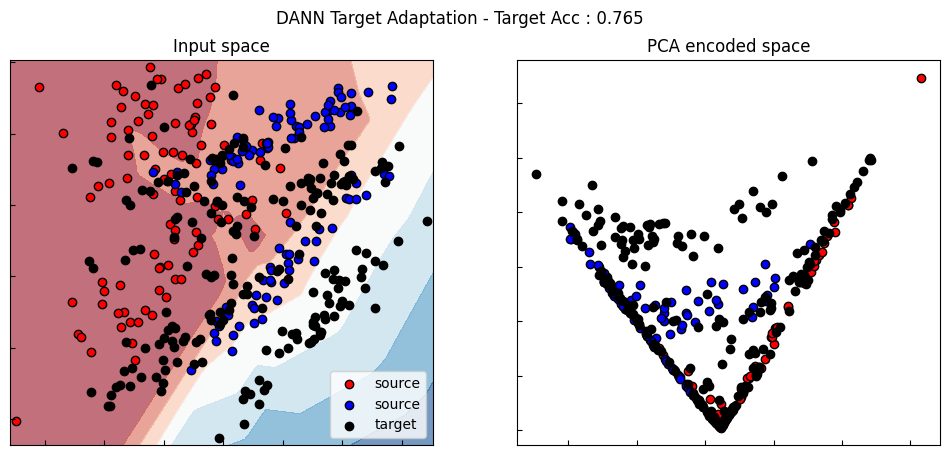

In [5]:
dann = DANN(**model_params)
dann.fit(xs, ys, xt, yt, **fit_params)
pd.DataFrame(dann.history_).plot(figsize=(6, 4))
plt.title("Training history", fontsize=14); plt.xlabel("Epochs"); plt.ylabel("Scores")
plt.legend(ncol=2)
plt.show()
visualize_decision_boundary2d(xs, ys, xt, yt, dann, name="DANN Target Adaptation")

Now repeat the process, but train to adapt to the global data points, then evaluate on target

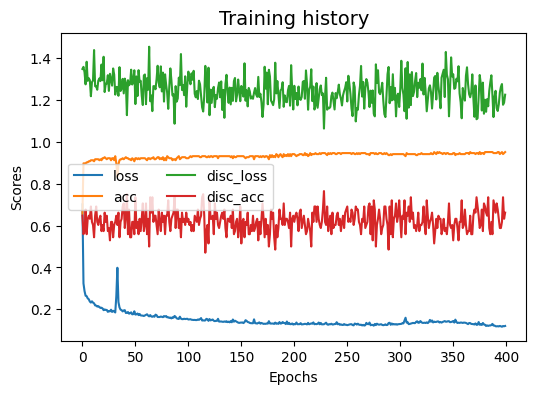

7/7 [==============================] - 0s 3ms/step


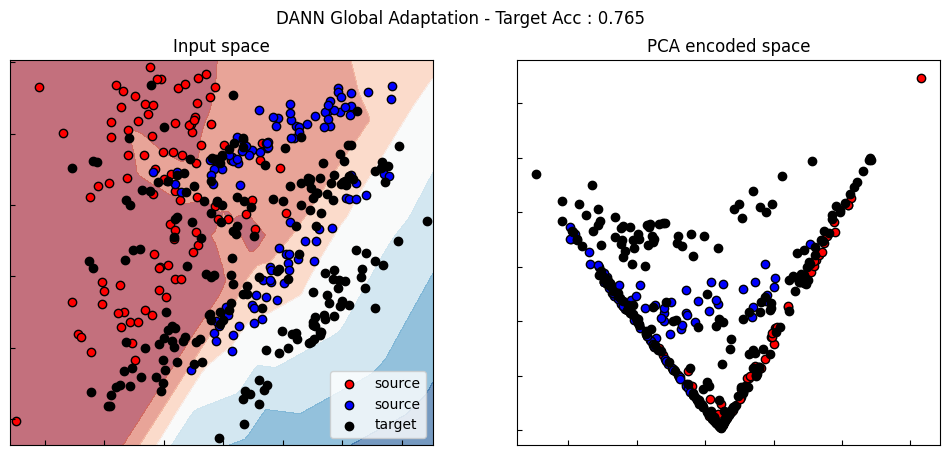

In [6]:
dann_global = DANN(**model_params)
dann_global.fit(xs, ys, xg, yg, **fit_params)
pd.DataFrame(dann_global.history_).plot(figsize=(6, 4))
plt.title("Training history", fontsize=14); plt.xlabel("Epochs"); plt.ylabel("Scores")
plt.legend(ncol=2)
plt.show()
visualize_decision_boundary2d(xs, ys, xt, yt, dann, name="DANN Global Adaptation")